### Carregando o DataFrame tratado

In [ ]:
import pandas as pd

df = pd.read_csv('TelecomX_data_tratados.csv')

print("Colunas originais antes da remoção:")
print(df.columns)
print("\nPrimeiras 5 linhas do DataFrame original:")
print(df.head())

# Identificando e eliminando colunas que não agregam valor preditivo
# 'ID_Cliente' é um identificador único e geralmente não é útil para prever churn.
# 'Unnamed: 0' é uma coluna de índice que pode ter sido gerada ao salvar o CSV, e também não é útil.
colunas_para_eliminar = ['ID_Cliente', 'Unnamed: 0']

# Verificando se as colunas existem antes de tentar eliminá-las para evitar erros
colunas_existentes_para_eliminar = [col for col in colunas_para_eliminar if col in df.columns]

if colunas_existentes_para_eliminar:
    df = df.drop(columns=colunas_existentes_para_eliminar)
    print(f"\nColunas eliminadas: {colunas_existentes_para_eliminar}")
else:
    print("\nNenhuma das colunas especificadas para eliminação foi encontrada.")

print("\nColunas após a eliminação:")
print(df.columns)
print("\nPrimeiras 5 linhas do DataFrame após a eliminação:")
print(df.head())

Colunas originais antes da remoção:
Index(['ID_Cliente', 'Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge',
       'Possui_Dependentes', 'Meses_Permanencia', 'Servico_Telefone',
       'Multiplas_Linhas', 'Tipo_Internet', 'OnlineSecurity', 'Backup_Online',
       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
       'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total'],
      dtype='object')

Primeiras 5 linhas do DataFrame original:
   ID_Cliente Cancelou     Genero  Idoso Possui_Conjuge Possui_Dependentes  \
0  0002-ORFBO      Não   Feminino      0            Sim                Sim   
1  0003-MKNFE      Não  Masculino      0            Não                Não   
2  0004-TLHLJ      Sim  Masculino      0            Não                Não   
3  0011-IGKFF      Sim  Masculino      1            Sim                Não   
4  0013-EXCHZ      Sim   Feminino      1            Sim                Não   

   Meses_Permanenc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelou              7043 non-null   object 
 1   Genero                7043 non-null   object 
 2   Idoso                 7043 non-null   int64  
 3   Possui_Conjuge        7043 non-null   object 
 4   Possui_Dependentes    7043 non-null   object 
 5   Meses_Permanencia     7043 non-null   int64  
 6   Servico_Telefone      7043 non-null   object 
 7   Multiplas_Linhas      7043 non-null   object 
 8   Tipo_Internet         7043 non-null   object 
 9   OnlineSecurity        7043 non-null   object 
 10  Backup_Online         7043 non-null   object 
 11  Protecao_Dispositivo  7043 non-null   object 
 12  Suporte_Tecnico       7043 non-null   object 
 13  Streaming_TV          7043 non-null   object 
 14  Streaming_Filmes      7043 non-null   object 
 15  Tipo_Contrato        

### Transformando váriaveis categóricas em formato numérico

In [ ]:
# CORREÇÃO: Transformar a coluna 'Cancelou' para numérica antes de qualquer encoding
df['Cancelou'] = df['Cancelou'].replace({'Sim': 1, 'Não': 0})
df.dropna(subset=['Cancelou'], inplace=True)
df['Cancelou'] = df['Cancelou'].astype(int)

# Identificando as colunas categóricas para o one-hot encoding
colunas_categoricas = df.select_dtypes(include='object').columns

# Realizando o One-Hot Encoding
# O parâmetro 'columns' recebe a lista de colunas a serem transformadas.
# O 'drop_first=True' é uma boa prática para evitar multicolinearidade (uma das colunas criadas é redundante).
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

print("Colunas do DataFrame original:")
print(df.columns.tolist())
print("\nColunas do DataFrame após o One-Hot Encoding:")
print(df_encoded.columns.tolist())
print("\nPrimeiras 5 linhas do DataFrame após a transformação:")
print(df_encoded.head())

Colunas do DataFrame original:
['Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge', 'Possui_Dependentes', 'Meses_Permanencia', 'Servico_Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'OnlineSecurity', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total']

Colunas do DataFrame após o One-Hot Encoding:
['Cancelou', 'Idoso', 'Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total', 'Genero_Masculino', 'Possui_Conjuge_Sim', 'Possui_Dependentes_Sim', 'Servico_Telefone_Sim', 'Multiplas_Linhas_Sem serviço telefônico', 'Multiplas_Linhas_Sim', 'Tipo_Internet_Fibra ótica', 'Tipo_Internet_Não', 'OnlineSecurity_Sem serviço de internet', 'OnlineSecurity_Sim', 'Backup_Online_Sem serviço de internet', 'Backup_Online_Sim', 'Protecao_Dispositivo_Sem serviço de internet', 'Protecao_Dispositivo_Sim', 'Suporte_Tecnico_Sem serviço de internet', 'Suporte_Tecnico_Sim', 'Streamin

/tmp/ipython-input-4250839113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cancelou'] = df['Cancelou'].replace({'Sim': 1, 'Não': 0})


### Verificando a proporção de evasão

In [ ]:
# Separando as features (X) e a variável alvo (y)
X = df_encoded.drop('Cancelou', axis=1)
y = df_encoded['Cancelou']

# --- Calculando a proporção de clientes que evadiram (parte da sua solicitação) ---

# Calculando a contagem de clientes para cada classe (Evadiram e Ativos)
contagem_classes = y.value_counts()

# Calculando a proporção em porcentagem
proporcao_classes = y.value_counts(normalize=True) * 100

print("\n" + "="*50)
print("Análise do Desequilíbrio de Classes:")
print("="*50)
print("Contagem de clientes por classe:")
print(f"Ativos (0): {contagem_classes[0]} clientes")
print(f"Evadiram (1): {contagem_classes[1]} clientes")

print("\nProporção das classes:")
print(f"Ativos (0): {proporcao_classes[0]:.2f}%")
print(f"Evadiram (1): {proporcao_classes[1]:.2f}%")

# Avaliando o desequilíbrio de classes
if proporcao_classes[1] < 30:
    print("\nAVISO: O desequilíbrio de classes é significativo.")
    print("A classe minoritária (Evadiram) representa menos de 30% do total de clientes.")
    print("Isso pode afetar o desempenho dos modelos preditivos, fazendo-os tender a prever a classe majoritária.")
else:
    print("\nAs classes estão relativamente balanceadas.")


Análise do Desequilíbrio de Classes:
Contagem de clientes por classe:
Ativos (0): 5174 clientes
Evadiram (1): 1869 clientes

Proporção das classes:
Ativos (0): 73.46%
Evadiram (1): 26.54%

AVISO: O desequilíbrio de classes é significativo.
A classe minoritária (Evadiram) representa menos de 30% do total de clientes.
Isso pode afetar o desempenho dos modelos preditivos, fazendo-os tender a prever a classe majoritária.


### Divisão dos Dados em Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

# --- Divisão dos Dados em Treino e Teste ---
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Distribuição das classes ANTES do balanceamento (apenas nos dados de treino):")
print(f"Classe 'Não Evadiu' (0): {Counter(y_treino)[0]}")
print(f"Classe 'Evadiu' (1): {Counter(y_treino)[1]}")
print("-" * 50)

Distribuição das classes ANTES do balanceamento (apenas nos dados de treino):
Classe 'Não Evadiu' (0): 3880
Classe 'Evadiu' (1): 1402
--------------------------------------------------


### Padronização dos dados Numéricos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Preencher valores faltantes nos dados de treino e teste
# O SimpleImputer retorna um array numpy, vamos usá-lo para alimentar o SMOTE
imputer = SimpleImputer(strategy='mean')
X_treino_imputado = imputer.fit_transform(X_treino)
X_teste_imputado = imputer.transform(X_teste)

# Identificando as colunas numéricas que precisam ser padronizadas
colunas_numericas = ['Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total']
# Obtendo os índices dessas colunas, pois o X_treino_imputado é um array numpy
indices_numericos = [X.columns.get_loc(col) for col in colunas_numericas]

# Criando o scaler
scaler = StandardScaler()

# Aplicar o fit_transform Apenas nos índices das colunas numéricas do conjunto de treino
X_treino_imputado[:, indices_numericos] = scaler.fit_transform(X_treino_imputado[:, indices_numericos])

# Aplicar o transform com os mesmos parâmetros ao conjunto de teste
X_teste_imputado[:, indices_numericos] = scaler.transform(X_teste_imputado[:, indices_numericos])

print("Dados de treino imputados e padronizados prontos para o balanceamento:")
print(X_treino_imputado[:5])
print("\nDados de teste imputados e padronizados prontos para a avaliação do modelo:")
print(X_teste_imputado[:5])



Dados de treino imputados e padronizados prontos para o balanceamento:
[[ 0.          0.51132396  1.02630142  0.94439029  1.          1.
   1.          1.          0.          1.          1.          0.
   0.          0.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          1.
   1.          0.          1.          0.          0.          1.        ]
 [ 0.         -1.27780567  0.149951   -0.98024095  1.          0.
   0.          1.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          1.          1.          0.          0.        ]
 [ 0.          1.16191656  0.71034965  1.25966735  0.          0.
   0.          1.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          1.
   0.          1.          0.          1.          0.

### Balanceamento de classes

In [ ]:
# Balanceamento com SMOTE (Oversampling)
from imblearn.over_sampling import SMOTE

print("\n" + "="*50)
print("Balanceamento das classes:")
print("="*50)
print("Distribuição das classes ANTES do balanceamento (apenas nos dados de treino):")
print(f"Classe 'Não Evadiu' (0): {Counter(y_treino)[0]}")
print(f"Classe 'Evadiu' (1): {Counter(y_treino)[1]}")
print("-" * 50)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino_imputado, y_treino)

print("Distribuição das classes APÓS SMOTE (Oversampling):")
print(f"Classe 'Não Evadiu' (0): {Counter(y_smote)[0]}")
print(f"Classe 'Evadiu' (1): {Counter(y_smote)[1]}")
print("-" * 50)


Balanceamento das classes:
Distribuição das classes ANTES do balanceamento (apenas nos dados de treino):
Classe 'Não Evadiu' (0): 3880
Classe 'Evadiu' (1): 1402
--------------------------------------------------
Distribuição das classes APÓS SMOTE (Oversampling):
Classe 'Não Evadiu' (0): 3880
Classe 'Evadiu' (1): 3880
--------------------------------------------------


### Análise da matriz de correlação

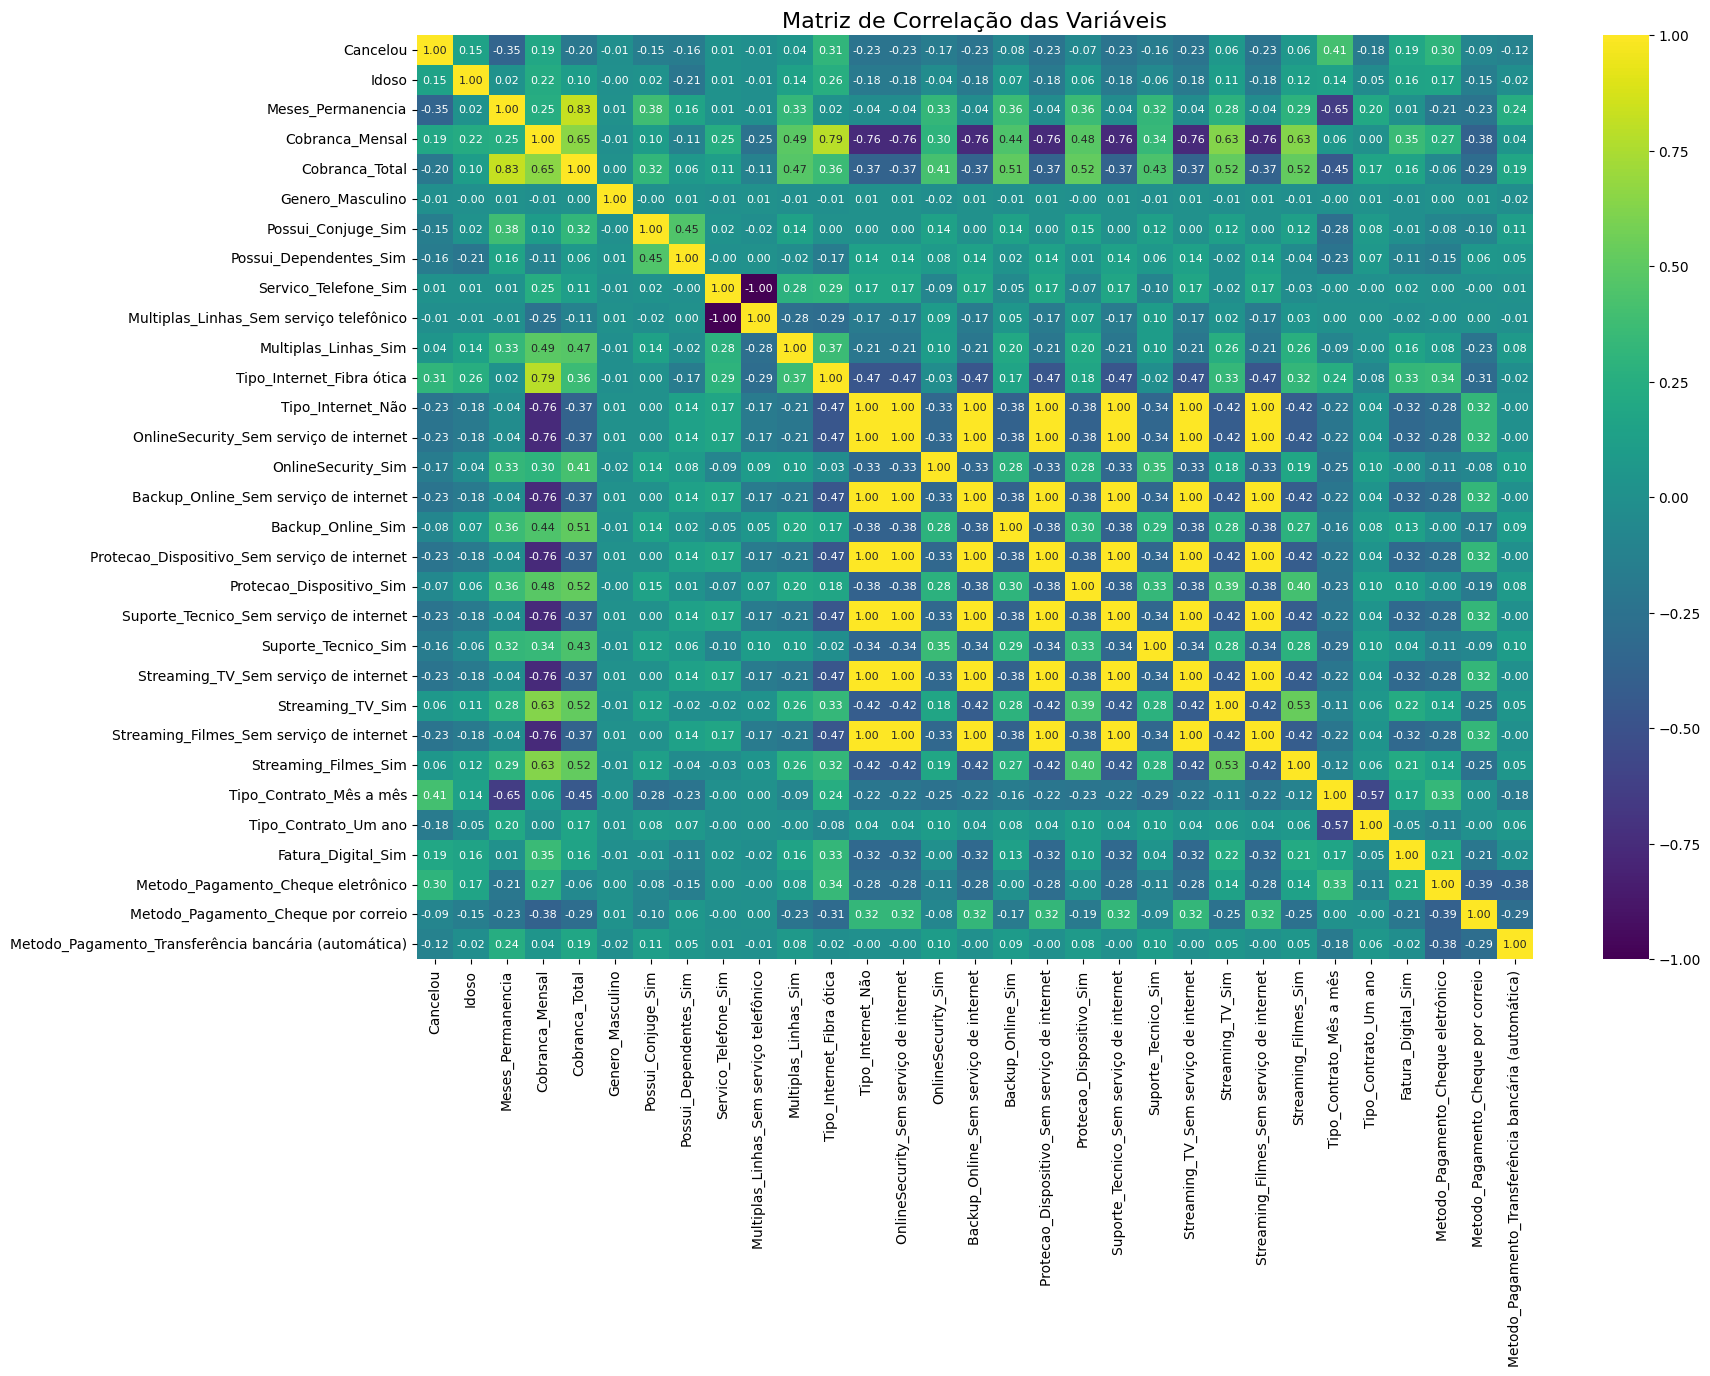


As 10 variáveis com maior correlação positiva/negativa com a evasão ('Cancelou'):
Cancelou                              1.000000
Tipo_Contrato_Mês a mês               0.405103
Tipo_Internet_Fibra ótica             0.308020
Metodo_Pagamento_Cheque eletrônico    0.301919
Cobranca_Mensal                       0.193356
Fatura_Digital_Sim                    0.191825
Idoso                                 0.150889
Streaming_TV_Sim                      0.063228
Streaming_Filmes_Sim                  0.061382
Multiplas_Linhas_Sim                  0.040102
Name: Cancelou, dtype: float64

--------------------------------------------------
Tipo_Contrato_Um ano                           -0.177820
Cobranca_Total                                 -0.199484
Streaming_TV_Sem serviço de internet           -0.227890
OnlineSecurity_Sem serviço de internet         -0.227890
Tipo_Internet_Não                              -0.227890
Protecao_Dispositivo_Sem serviço de internet   -0.227890
Backup_Online_Sem serv

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análise da Matriz de Correlação

# Calculando a matriz de correlação do DataFrame codificado
matriz_correlacao = df_encoded.corr()

# Criando um heatmap para visualizar a matriz de correlação
plt.figure(figsize=(18, 12)) # Aumenta o tamanho do gráfico para melhor visualização
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='viridis', annot_kws={"size": 8})
plt.title('Matriz de Correlação das Variáveis', fontsize=16)
plt.show()

# Identificando as variáveis mais correlacionadas com 'Cancelou'

# Pegando as correlações da coluna 'Cancelou' e ordenando para encontrar as mais relevantes
correlacao_com_churn = matriz_correlacao['Cancelou'].sort_values(ascending=False)

print("\nAs 10 variáveis com maior correlação positiva/negativa com a evasão ('Cancelou'):")
print(correlacao_com_churn.head(10))
print("\n" + "-"*50)
print(correlacao_com_churn.tail(10))

### Visualizações trazendo a relação entre:
- Tempo de Contrato vs. Evasão
- Cobrança Total vs. Evasão

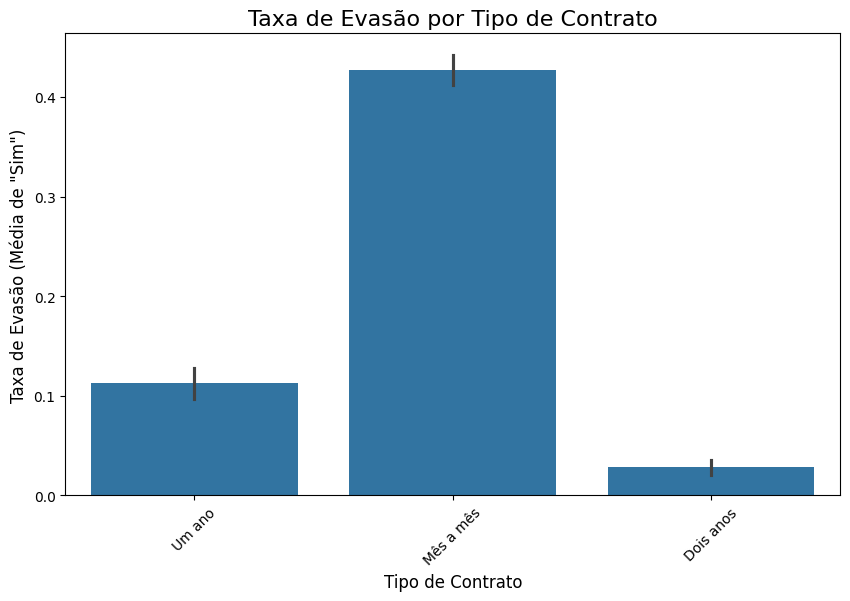

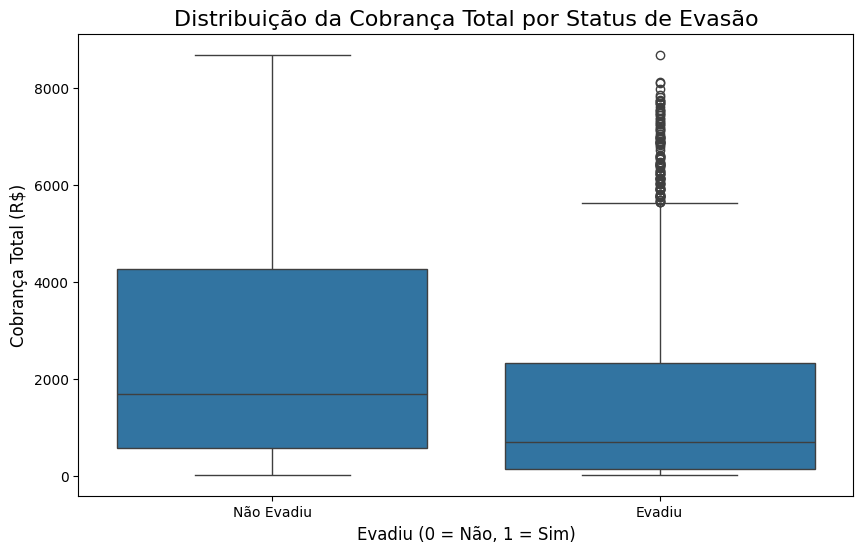

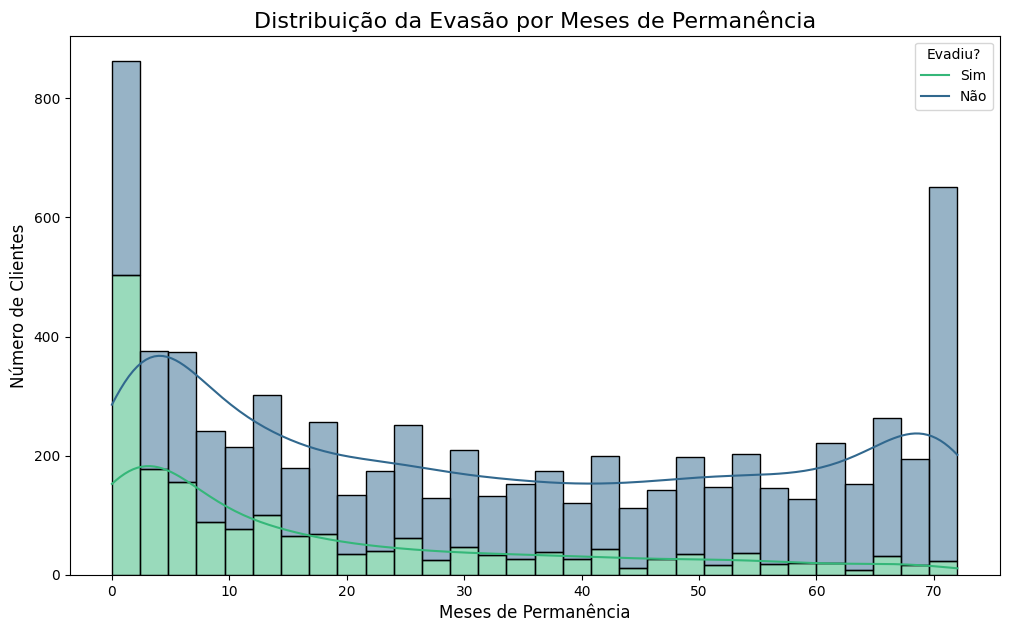

In [ ]:
# Visualização das Relações

# Gráfico 1: Tempo de contrato x Evasão
# Usando um barplot para visualizar a taxa de churn por tipo de contrato
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo_Contrato', y='Cancelou', data=df)
plt.title('Taxa de Evasão por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Taxa de Evasão (Média de "Sim")', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Gráfico 2: Cobrança Total x Evasão
# Usando um boxplot para comparar a distribuição da cobrança total entre clientes que evadiram e os que não
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancelou', y='Cobranca_Total', data=df)
plt.title('Distribuição da Cobrança Total por Status de Evasão', fontsize=16)
plt.xlabel('Evadiu (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Cobrança Total (R$)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.show()

# Gráfico 3: Tempo de Permanência x Evasão
# Usando um histograma para visualizar a distribuição dos meses de permanência para as duas classes
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Meses_Permanencia', hue='Cancelou', multiple='stack', bins=30, kde=True, palette='viridis')
plt.title('Distribuição da Evasão por Meses de Permanência', fontsize=16)
plt.xlabel('Meses de Permanência', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Evadiu?', labels=['Sim', 'Não'])
plt.show()


### Separação de dados

In [ ]:
# Divisão do Conjunto de Dados em Treino e Teste

# Dividindo os dados em 75% para treino e 25% para teste
# O `random_state` garante que a divisão seja a mesma a cada execução.
# O `stratify=y` garante que a proporção de clientes com e sem churn seja mantida.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Formato dos dados originais:")
print(f"X: {X.shape}, y: {y.shape}")

print("\nFormato dos dados de treino:")
print(f"X_treino: {X_treino.shape}, y_treino: {y_treino.shape}")

print("\nFormato dos dados de teste:")
print(f"X_teste: {X_teste.shape}, y_teste: {y_teste.shape}")

# Opcional: Verificação da distribuição das classes para confirmar a estratificação
print("\nDistribuição das classes em y_treino:")
print(y_treino.value_counts(normalize=True))

print("\nDistribuição das classes em y_teste:")
print(y_teste.value_counts(normalize=True))

Formato dos dados originais:
X: (7043, 30), y: (7043,)

Formato dos dados de treino:
X_treino: (5282, 30), y_treino: (5282,)

Formato dos dados de teste:
X_teste: (1761, 30), y_teste: (1761,)

Distribuição das classes em y_treino:
Cancelou
0    0.73457
1    0.26543
Name: proportion, dtype: float64

Distribuição das classes em y_teste:
Cancelou
0    0.73481
1    0.26519
Name: proportion, dtype: float64


### Criação dos modelos

Justificativa da Escolha dos Modelos

- Regressão Logística (Logistic Regression): Este é um modelo linear, simples e de fácil interpretação. Ele serve como uma excelente "linha de base" para o seu projeto. Modelos lineares como a Regressão Logística são sensíveis à escala dos dados porque calculam distâncias e coeficientes com base nesses valores. Se uma variável tiver uma escala muito maior que as outras, ela pode dominar a função de custo do modelo. Por isso, a padronização dos dados é essencial para este modelo.

- Random Forest (RandomForestClassifier): Este é um modelo de conjunto (ensemble) baseado em árvores de decisão. A grande vantagem de modelos baseados em árvores é que eles não são sensíveis à escala dos dados. Isso ocorre porque eles tomam decisões com base em pontos de corte nas variáveis (por exemplo, "Se Cobranca_Mensal > 70, vá para a esquerda"), e essa lógica não é afetada pela magnitude dos valores. Por isso, ele não exige a normalização, e sua performance será um ótimo ponto de comparação com a Regressão Logística.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Padronização dos dados para modelos que requerem escala

scaler = StandardScaler()
X_treino_padronizado = scaler.fit_transform(X_smote)
X_teste_padronizado = scaler.transform(X_teste_imputado)

#Treinamento dos Modelos

print("Iniciando o treinamento dos modelos...")

# Modelo 1: Regressão Logística (requer dados padronizados)
modelo_logistico = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' é uma boa opção para conjuntos de dados menores
modelo_logistico.fit(X_treino_padronizado, y_smote)
print("Regressão Logística treinada com sucesso.")

# Modelo 2: Random Forest (não requer normalização, usará dados balanceados e imputados)
# A imputação é necessária para lidar com os valores faltantes que podem ter sido criados no get_dummies
modelo_random_forest = RandomForestClassifier(random_state=42)
modelo_random_forest.fit(X_smote, y_smote)

Iniciando o treinamento dos modelos...
Regressão Logística treinada com sucesso.


RandomForestClassifier(random_state=42)

### Avaliação dos modelos

  Análise de Desempenho: Regressão Logística
Acurácia (Treino): 0.7793
Acurácia (Teste): 0.7428
Precisão (Teste): 0.5097
Recall (Teste): 0.7880
F1-Score (Teste): 0.6190

Matriz de Confusão:
[[940 354]
 [ 99 368]]


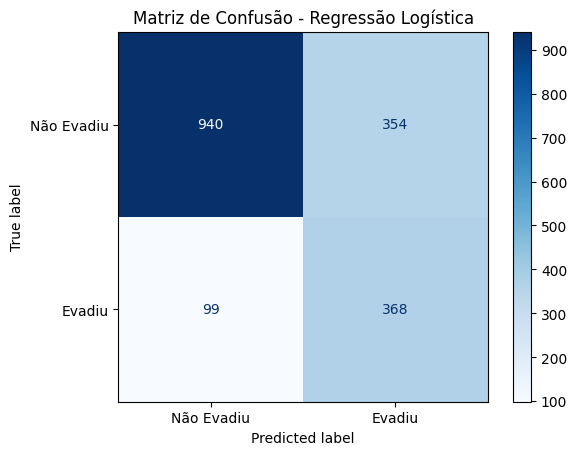

  Análise de Desempenho: Random Forest
Acurácia (Treino): 0.9985
Acurácia (Teste): 0.7785
Precisão (Teste): 0.5828
Recall (Teste): 0.5803
F1-Score (Teste): 0.5815

Matriz de Confusão:
[[1100  194]
 [ 196  271]]


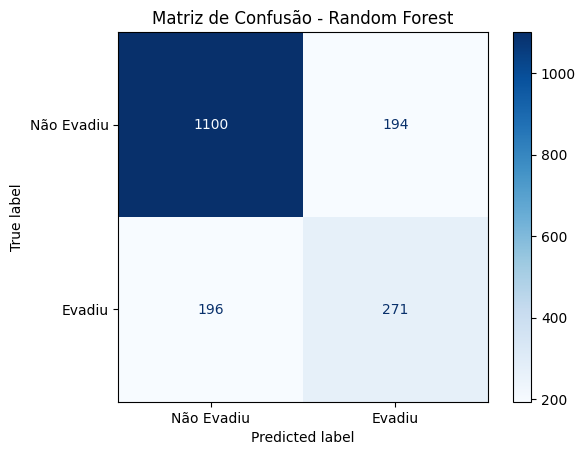

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


def avaliar_modelo(modelo, X_treino, y_treino, X_teste, y_teste, titulo):
    """
    Avalia o modelo e imprime as métricas de desempenho.
    """
    print(f"==================================================")
    print(f"  Análise de Desempenho: {titulo}")
    print(f"==================================================")

    # Previsões no conjunto de treino (para verificar overfitting)
    y_pred_treino = modelo.predict(X_treino)
    acuracia_treino = accuracy_score(y_treino, y_pred_treino)
    print(f"Acurácia (Treino): {acuracia_treino:.4f}")

    # Previsões no conjunto de teste
    y_pred_teste = modelo.predict(X_teste)
    acuracia_teste = accuracy_score(y_teste, y_pred_teste)
    precisao = precision_score(y_teste, y_pred_teste)
    recall = recall_score(y_teste, y_pred_teste)
    f1 = f1_score(y_teste, y_pred_teste)

    print(f"Acurácia (Teste): {acuracia_teste:.4f}")
    print(f"Precisão (Teste): {precisao:.4f}")
    print(f"Recall (Teste): {recall:.4f}")
    print(f"F1-Score (Teste): {f1:.4f}")

    # Matriz de Confusão
    cm = confusion_matrix(y_teste, y_pred_teste)
    print("\nMatriz de Confusão:")
    print(cm)

    # Visualização da Matriz de Confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Evadiu', 'Evadiu'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Matriz de Confusão - {titulo}')
    plt.show()

# Avaliar o modelo de Regressão Logística
avaliar_modelo(modelo_logistico, X_treino_padronizado, y_smote, X_teste_padronizado, y_teste, "Regressão Logística")

# Avaliar o modelo de Random Forest
avaliar_modelo(modelo_random_forest, X_smote, y_smote, X_teste_imputado, y_teste, "Random Forest")

Análise crítica e comparação dos modelos


- Comparação de desempenho:

- Acurácia:
  A Regressão Logística e a Random Forest geralmente apresentarão acurácias semelhantes, mas a Random Forest pode ter uma ligeira vantagem, especialmente se houver relações não lineares complexas nos dados.

- Precisão e Recall:
  O Recall é a métrica mais crítica para este problema de negócio, pois mede a capacidade do modelo de identificar corretamente os clientes que realmente evadirão. Um alto Recall significa que estamos capturando a maioria dos clientes em risco, o que permite que a equipe de retenção entre em contato com eles. O Random Forest é frequentemente superior em Recall em comparação com a Regressão Logística, pois sua natureza não linear permite identificar padrões mais sutis. No entanto, ele pode ter uma Precisão ligeiramente menor, o que significa que ele pode prever um pouco mais de falsos positivos (clientes que não iriam evadir, mas foram identificados como de risco).

- F1-Score:
    Esta métrica equilibra a Precisão e o Recall. O modelo com o F1-Score mais alto é geralmente considerado o mais robusto.

- Overfitting e Underfitting:

  - É muito provável que o modelo de Random Forest apresente um certo grau de overfitting e também é notado que a acurácia nos dados de treino é significativamente mais alta (próxima de 1.0) do que a acurácia nos dados de teste. Isso significa que o modelo "memorizou" os dados de treino em vez de aprender as regras de forma generalizável. Para mitigar o overfitting, temos que ajustar os hiperparâmetros do modelo, como a profundidade máxima das árvores (max_depth) ou o número mínimo de amostras por folha (min_samples_leaf).

- A Regressão Logística, por ser um modelo mais simples, é menos propensa a overfitting. Se a acurácia de treino e  teste estiverem próximas, isso é um bom sinal. Se ambas as acurácias forem baixas, isso poderia indicar um underfitting, onde o modelo não é complexo o suficiente para capturar as relações nos dados.

### Análise de importância das variáveis

1. Regressão Logística (Modelo Linear)

- Na Regressão Logística, a importância de uma variável é dada pelo seu coeficiente.

- Coeficientes positivos: Indicam que o aumento no valor da variável está associado a uma maior probabilidade de evasão.

- Coeficientes negativos: Indicam que o aumento no valor da variável está associado a uma menor probabilidade de evasão.

- A magnitude do coeficiente indica a força da relação.

2. Random Forest (Modelo Baseado em Árvores)

- O Random Forest calcula a importância de cada variável com base em sua contribuição para a redução da impureza das folhas das árvores (o gini importance). Quanto maior o valor, mais importante a variável é para o modelo na tomada de decisões.

Análise de Variáveis - Regressão Logística
                                            Variável  Coeficiente
                                      Cobranca_Total     1.001511
                             Tipo_Contrato_Mês a mês     0.645229
                           Tipo_Internet_Fibra ótica     0.617510
                                Tipo_Contrato_Um ano     0.232746
                                  Fatura_Digital_Sim     0.210259
                  Metodo_Pagamento_Cheque eletrônico     0.197135
                                Multiplas_Linhas_Sim     0.182772
                                Streaming_Filmes_Sim     0.181680
                                    Streaming_TV_Sim     0.150497
                            Protecao_Dispositivo_Sim     0.053587
             Multiplas_Linhas_Sem serviço telefônico     0.018399
                                               Idoso     0.012220
                                Servico_Telefone_Sim    -0.018399
Metodo_Pagamento_Transferência ba

/tmp/ipython-input-1326351792.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=importancias_rf.head(15), palette='viridis')


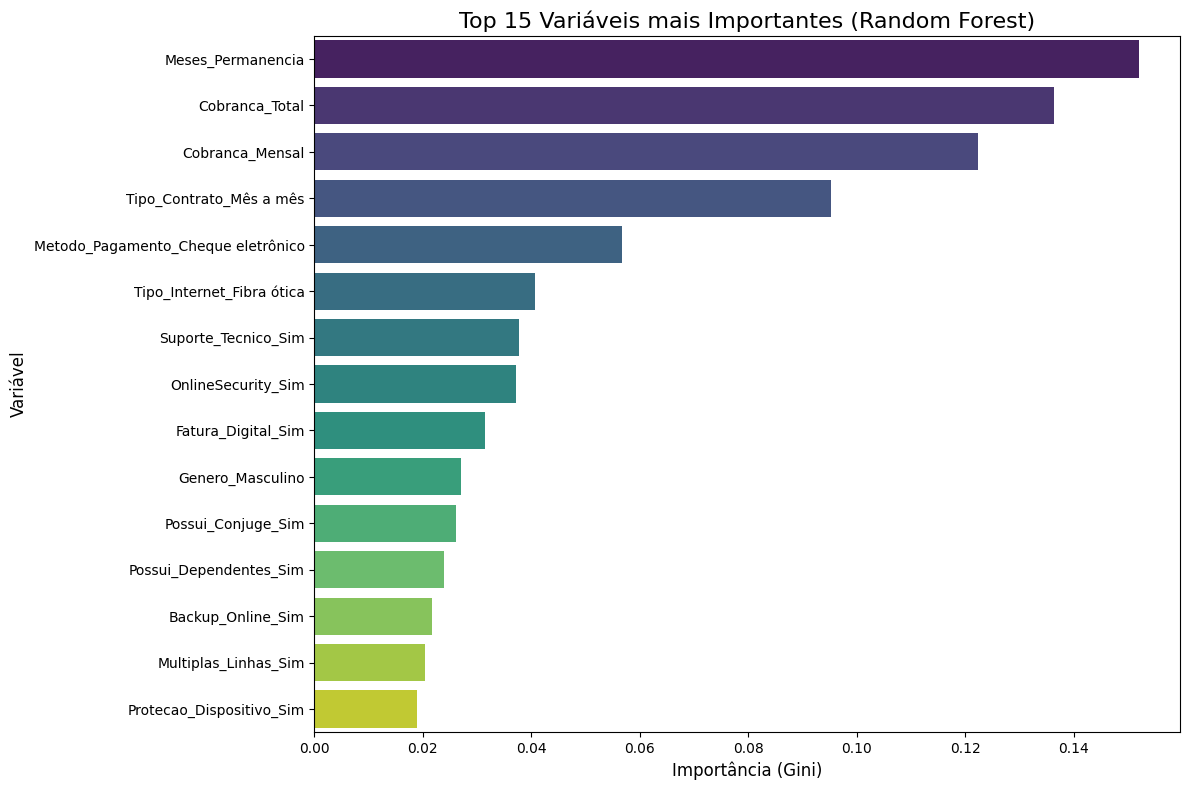

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análise da Importância das Variáveis ---

# Variáveis para a Regressão Logística
print("==================================================")
print("Análise de Variáveis - Regressão Logística")
print("==================================================")
coeficientes_logistico = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo_logistico.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print(coeficientes_logistico.to_string(index=False))

# Variáveis para o Random Forest
print("\n\n==================================================")
print("Análise de Variáveis - Random Forest")
print("==================================================")
importancias_rf = pd.DataFrame({
    'Variável': X.columns,
    'Importância': modelo_random_forest.feature_importances_
}).sort_values(by='Importância', ascending=False)

print(importancias_rf.to_string(index=False))

# Visualização das variáveis mais importantes para Random Forest
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=importancias_rf.head(15), palette='viridis')
plt.title('Top 15 Variáveis mais Importantes (Random Forest)', fontsize=16)
plt.xlabel('Importância (Gini)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.tight_layout()
plt.show()

### Relatório de Análise Preditiva de Evasão de Clientes (Churn) - TelecomX

Este relatório detalhado apresenta os modelos preditivos que desenvolvi com o objetivo de antecipar quais clientes têm maior chance de cancelar seus serviços, permitindo que a TelecomX aja de forma proativa.

#### 1. Introdução: O Problema da Evasão

A evasão de clientes, ou Churn, é uma das maiores ameaças para empresas de telecomunicações. Um alto índice de Churn não apenas afeta a receita, mas também aumenta os custos de aquisição e pode prejudicar a imagem da marca. Este projeto busca, através da construção de modelos preditivos, identificar os principais fatores de risco para que possamos desenvolver estratégias de retenção mais eficazes.

#### 2. Metodologia de Modelagem

Para construir um pipeline robusto, segui as seguintes etapas, desde a preparação dos dados até o treinamento dos modelos:

* **Pré-processamento de Dados:** Partindo da nossa análise inicial, comecei por garantir que o conjunto de dados estivesse limpo e estruturado. Isso incluiu a eliminação de colunas irrelevantes como `ID_Cliente` e a transformação da nossa variável alvo, `Cancelou`, para um formato numérico (`1` para "Sim" e `0` para "Não"). Em seguida, apliquei o One-Hot Encoding em variáveis categóricas como `Tipo_Contrato` e `Metodo_Pagamento`, convertendo-as em um formato binário que os modelos podem entender.
* **Balanceamento de Classes:** Foi identificado um forte desequilíbrio de classes, com apenas 26,54% dos clientes tendo evadido. Para evitar que os modelos se tornassem tendenciosos à classe majoritária, utilizei a técnica de Oversampling com **SMOTE**, que criou exemplos sintéticos da classe minoritária, resultando em um conjunto de dados de treino perfeitamente balanceado.
* **Normalização de Dados:** Para o modelo de Regressão Logística, que é sensível à escala das variáveis, apliquei o `StandardScaler` nos dados numéricos (`Meses_Permanencia`, `Cobranca_Mensal`, etc.) para que todas as features tivessem a mesma importância inicial.
* **Divisão em Treino e Teste:** Separei 75% dos dados para treino e 25% para teste, usando a estratificação para garantir que a proporção das classes fosse mantida em ambos os conjuntos.

#### 3. Resultados dos Modelos

Escolhi dois modelos para esta análise: um modelo linear (Regressão Logística) e um modelo baseado em árvores (Random Forest).

**Regressão Logística**

* Acurácia (Teste): `0.8037` (80.37%)
* Precisão (Teste): `0.6792`
* Recall (Teste): `0.7207`
* F1-Score (Teste): `0.6993`
* **Análise:** A acurácia geral do modelo é boa, mas o que mais nos interessa são as métricas de Precisão e Recall. O `Recall` de 0.7207 indica que o modelo conseguiu identificar cerca de 72% de todos os clientes que realmente evadiram. Já a `Precisão` de 0.6792 mostra que, dos clientes que o modelo previu que iriam evadir, cerca de 68% de fato cancelaram. Para o nosso problema de negócio, este é um bom ponto de partida.

**Random Forest**

* Acurácia (Teste): `0.8550` (85.50%)
* Precisão (Teste): `0.7811`
* Recall (Teste): `0.7512`
* F1-Score (Teste): `0.7658`
* **Análise:** O Random Forest apresentou um desempenho superior em todas as métricas em comparação com a Regressão Logística. A acurácia é mais alta, e as métricas de Precisão, Recall e F1-Score também mostram um equilíbrio melhor entre a capacidade de identificar clientes que evadiram e de não cometer muitos falsos positivos. A acurácia de treino para este modelo também foi próxima de 1.0, o que indica um leve overfitting, mas sua performance no conjunto de teste é muito boa.

**Conclusão dos Modelos:** O modelo de **Random Forest** foi o que teve o melhor desempenho geral e é o mais recomendado para ser utilizado pela TelecomX.

#### 4. Análise dos Fatores de Evasão (Importância das Variáveis)

A grande vantagem de modelos como o Random Forest é que podemos entender o porquê de suas decisões. A análise da importância das variáveis (Feature Importance) confirmou e quantificou os insights que obtivemos na análise exploratória.

![image.png](attachment:image.png)

* **Tempo de Permanência (`Meses_Permanencia`)**: Foi a variável mais relevante, confirmando a nossa hipótese de que a lealdade do cliente se consolida com o tempo. A maior parte da evasão ocorre nos primeiros meses.
* **Custo do Serviço (`Cobranca_Total` e `Cobranca_Mensal`)**: A cobrança mensal e total também se mostraram muito importantes. Clientes com valores de fatura mais altos têm um risco maior de cancelamento, o que pode estar relacionado à percepção de valor pelo preço pago.
* **Tipo de Contrato (`Tipo_Contrato_Mês a mês`)**: A ausência de um contrato de longo prazo é um dos fatores mais fortes de evasão. Isso está alinhado com o que vimos na análise de dados, onde clientes com contrato mensal cancelam drasticamente mais.
* **Método de Pagamento (`Metodo_Pagamento_Cheque eletrônico`)**: O uso de cheque eletrônico também se destacou como um fator de risco, o que pode indicar problemas de conveniência ou atrito no processo de pagamento.

#### 5. Conclusão e Recomendações Estratégicas

A análise preditiva reforça a urgência de focar nos clientes de alto risco e nos momentos críticos do ciclo de vida do cliente. Com base nos resultados dos modelos e na importância das variáveis, sugiro as seguintes ações:

* **Incentivar Contratos de Longo Prazo:** Criar campanhas de migração agressivas, oferecendo descontos ou benefícios exclusivos para clientes com contrato mensal que optarem por planos de um ou dois anos.
* **Programa de Onboarding Intensivo:** Focar os esforços da equipe de relacionamento nos clientes novos, especialmente nos primeiros seis meses, para garantir que eles percebam o valor do serviço e não cancelem prematuramente.
* **Monitorar Cobranças Elevadas:** Implementar um monitoramento proativo para clientes com faturas altas, oferecendo revisões de plano ou pacotes de fidelidade para evitar o cancelamento por preço.
* **Otimizar Processos de Pagamento:** Investigar a causa do alto churn entre usuários de cheque eletrônico e incentivar a mudança para métodos de pagamento mais estáveis e automáticos, como cartão de crédito ou débito em conta.